<a href="https://colab.research.google.com/github/Borys1no/Borys1no/blob/main/oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import os

In [ ]:
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


def estandarizar(ex):
    return (ex - ex.mean()) / ex.std()



drive.mount('/content/drive')
np.set_printoptions(precision=10, suppress=True)
datos = pd.read_csv("/content/drive/My Drive/data.csv")
print(datos.head())
datos.shape
total_nan =datos.isnull().any(axis=1)
totalF = total_nan.sum()


Mounted at /content/drive
          WL     C/G     G/N     P/G       400     399.5       399     398.5  \
0  AGUACLARA  0.0000  1.0680  0.0398  0.038911  0.040531  0.042010  0.043341   
1    AGUAL02  0.0000  0.8207  0.6335  0.091295  0.094527  0.097521  0.100251   
2      ARCHT  0.0001  1.1932  0.4353  0.055657  0.058236  0.060606  0.062744   
3       ASUS     NaN     NaN     NaN  0.059881  0.062731  0.065331  0.067625   
4     BALREP  0.0000  1.0621  0.0297  0.057428  0.059920  0.062179  0.064190   

        398     397.5  ...     194.5       194     193.5       193     192.5  \
0  0.044509  0.045531  ... -0.031470 -0.032718 -0.031738 -0.031211 -0.033137   
1  0.102680  0.104834  ... -0.038201 -0.038967 -0.038387 -0.038184 -0.039430   
2  0.064628  0.066275  ... -0.035908 -0.036677 -0.036339 -0.036238 -0.003810   
3  0.069610  0.071288  ... -0.011623 -0.011494 -0.010422 -0.010354 -0.011640   
4  0.065929  0.067420  ... -0.038808 -0.039660 -0.039182 -0.038191 -0.040188   

        192 

In [ ]:
nan_rows = datos[pd.isnull(datos).any(axis=1)]
print("Filas con NaN:\n", nan_rows)

Filas con NaN:
        WL  C/G  G/N  P/G       400     399.5       399     398.5       398  \
3    ASUS  NaN  NaN  NaN  0.059881  0.062731  0.065331  0.067625  0.069610   
5    BASE  NaN  NaN  NaN  0.065730  0.068994  0.072007  0.074728  0.077128   
6      BB  NaN  NaN  NaN  0.059393  0.062003  0.064382  0.066484  0.068311   
9   CHANK  NaN  NaN  NaN  0.059933  0.062564  0.064960  0.067098  0.068943   
10    CHE  NaN  NaN  NaN  0.029683  0.030960  0.032128  0.033180  0.034108   
11    CHP  NaN  NaN  NaN  0.059401  0.062172  0.064697  0.066930  0.068862   
12     CI  NaN  NaN  NaN  0.084167  0.087742  0.091053  0.094063  0.096736   
15     GP  NaN  NaN  NaN  0.046249  0.048523  0.050603  0.052462  0.054084   
16  HLSJP  NaN  NaN  NaN  0.033944  0.035382  0.036668  0.037788  0.038742   
17   HLSM  NaN  NaN  NaN  0.067452  0.070814  0.073904  0.076684  0.079120   
19    LGG  NaN  NaN  NaN  0.077460  0.081327  0.084957  0.088312  0.091351   
21  LLMAS  NaN  NaN  NaN  0.064442  0.066855  0.

In [ ]:
print(totalF)

19


In [ ]:
datos

,WL,C/G,G/N,P/G,400,399.5,399,398.5,398,397.5,...,194.5,194,193.5,193,192.5,192,191.5,191,190.5,190
0,AGUACLARA,0.0000,1.0680,0.0398,0.038911,0.040531,0.042010,0.043341,0.044509,0.045531,...,-0.031470,-0.032718,-0.031738,-0.031211,-0.033137,-0.034025,-0.035131,-0.038121,-0.038988,-0.039591
1,AGUAL02,0.0000,0.8207,0.6335,0.091295,0.094527,0.097521,0.100251,0.102680,0.104834,...,-0.038201,-0.038967,-0.038387,-0.038184,-0.039430,-0.039324,-0.040177,-0.042767,-0.042756,-0.043169
2,ARCHT,0.0001,1.1932,0.4353,0.055657,0.058236,0.060606,0.062744,0.064628,0.066275,...,-0.035908,-0.036677,-0.036339,-0.036238,-0.003810,-0.038744,-0.039666,-0.041618,-0.041893,-0.042257
3,ASUS,NaN,NaN,NaN,0.059881,0.062731,0.065331,0.067625,0.069610,0.071288,...,-0.011623,-0.011494,-0.010422,-0.010354,-0.011640,-0.011216,-0.012399,-0.014607,-0.014871,-0.015332
4,BALREP,0.0000,1.0621,0.0297,0.057428,0.059920,0.062179,0.064190,0.065929,0.067420,...,-0.038808,-0.039660,-0.039182,-0.038191,-0.040188,-0.040158,-0.041435,-0.043226,-0.043769,-0.044302
5,BASE,NaN,NaN,NaN,0.065730,0.068994,0.072007,0.074728,0.077128,0.079213,...,-0.030065,-0.030913,-0.030427,-0.030065,-0.031735,-0.032500,-0.034374,-0.035994,-0.036041,-0.035945
6,BB,NaN,NaN,NaN,0.059393,0.062003,0.064382,0.066484,0.068311,0.069871,...,-0.038590,-0.039290,-0.039085,-0.039217,-0.040947,-0.041169,-0.042409,-0.045475,-0.046121,-0.046857
7,CAT01,0.0000,0.7846,0.1930,0.051442,0.054170,0.056639,0.058819,0.060681,0.062242,...,-0.031851,-0.032031,-0.031328,-0.031234,-0.032842,-0.032777,-0.033630,-0.035894,-0.036379,-0.036836
8,CAT02,0.0000,0.8006,0.4708,0.056960,0.059772,0.062323,0.064584,0.066519,0.068153,...,-0.038324,-0.039388,-0.039289,-0.038897,-0.040833,-0.040995,-0.041835,-0.044519,-0.045283,-0.045702
9,CHANK,NaN,NaN,NaN,0.059933,0.062564,0.064960,0.067098,0.068943,0.070531,...,-0.037781,-0.038929,-0.038568,-0.038826,-0.040436,-0.041401,-0.042255,-0.044495,-0.044752,-0.044374


In [ ]:
completos =datos.dropna()
t_comp =datos.iloc[:, 2:5].copy()
t_esp = datos.iloc[:, 5:].copy()

t_espe_std = estandarizar(datos.iloc[:, 5:].copy())
c_comp_std = estandarizar(completos.iloc[:, 2:5].copy())


c_espe_std = t_espe_std[t_espe_std.index.isin(c_comp_std.index)].copy()

In [ ]:
print(datos)

           WL     C/G     G/N     P/G       400     399.5       399     398.5  \
0   AGUACLARA  0.0000  1.0680  0.0398  0.038911  0.040531  0.042010  0.043341   
1     AGUAL02  0.0000  0.8207  0.6335  0.091295  0.094527  0.097521  0.100251   
2       ARCHT  0.0001  1.1932  0.4353  0.055657  0.058236  0.060606  0.062744   
3        ASUS     NaN     NaN     NaN  0.059881  0.062731  0.065331  0.067625   
4      BALREP  0.0000  1.0621  0.0297  0.057428  0.059920  0.062179  0.064190   
5        BASE     NaN     NaN     NaN  0.065730  0.068994  0.072007  0.074728   
6          BB     NaN     NaN     NaN  0.059393  0.062003  0.064382  0.066484   
7       CAT01  0.0000  0.7846  0.1930  0.051442  0.054170  0.056639  0.058819   
8       CAT02  0.0000  0.8006  0.4708  0.056960  0.059772  0.062323  0.064584   
9       CHANK     NaN     NaN     NaN  0.059933  0.062564  0.064960  0.067098   
10        CHE     NaN     NaN     NaN  0.029683  0.030960  0.032128  0.033180   
11        CHP     NaN     Na

In [ ]:
from sklearn.linear_model import LogisticRegression

X= c_espe_std
y= c_comp_std

X,y

(       399.5       399     398.5       398     397.5       397     396.5  \
 0  -1.164676 -0.987396 -1.181798 -1.186281 -1.188489 -1.188919 -1.187887   
 1   2.400452  2.155215  2.308548  2.275456  2.250328  2.231865  2.218575   
 2   0.004304  0.065321  0.008178  0.010982  0.014388  0.018260  0.022586   
 4   0.115510  0.154400  0.096912  0.088421  0.080795  0.073647  0.067065   
 7  -0.264122 -0.159266 -0.232509 -0.223866 -0.219468 -0.218912 -0.220951   
 8   0.105726  0.162541  0.121034  0.123568  0.123294  0.121013  0.117098   
 13 -0.823866 -0.674240 -0.824814 -0.826862 -0.830245 -0.833718 -0.837756   
 14  0.273133  0.309914  0.284334  0.286058  0.285049  0.282046  0.277803   
 18  0.025485  0.060464 -0.022665 -0.044606 -0.065210 -0.084170 -0.101881   
 20  1.276614  1.191379  1.261908  1.256983  1.253774  1.253130  1.254038   
 22 -1.288903 -1.087402 -1.281810 -1.273754 -1.263217 -1.250703 -1.236784   
 23 -0.088574 -0.008892 -0.069657 -0.065357 -0.063761 -0.065106 -0.068654   

In [ ]:
from sklearn.impute import SimpleImputer

datos_numericos = datos.select_dtypes(include='number')

imputador = SimpleImputer(strategy='mean')

imputador.fit(datos_numericos)

datos_imputados_numericos = imputador.transform(datos_numericos)

datos_imputados_numericos = pd.DataFrame(datos_imputados_numericos, columns=datos_numericos.columns)

datos_imputados = pd.concat([datos['WL'], datos_imputados_numericos], axis=1)

print(datos_imputados)


           WL       C/G       G/N       P/G       400     399.5       399  \
0   AGUACLARA  0.000000  1.068000  0.039800  0.038911  0.040531  0.042010   
1     AGUAL02  0.000000  0.820700  0.633500  0.091295  0.094527  0.097521   
2       ARCHT  0.000100  1.193200  0.435300  0.055657  0.058236  0.060606   
3        ASUS  0.014282  0.915546  0.376232  0.059881  0.062731  0.065331   
4      BALREP  0.000000  1.062100  0.029700  0.057428  0.059920  0.062179   
5        BASE  0.014282  0.915546  0.376232  0.065730  0.068994  0.072007   
6          BB  0.014282  0.915546  0.376232  0.059393  0.062003  0.064382   
7       CAT01  0.000000  0.784600  0.193000  0.051442  0.054170  0.056639   
8       CAT02  0.000000  0.800600  0.470800  0.056960  0.059772  0.062323   
9       CHANK  0.014282  0.915546  0.376232  0.059933  0.062564  0.064960   
10        CHE  0.014282  0.915546  0.376232  0.029683  0.030960  0.032128   
11        CHP  0.014282  0.915546  0.376232  0.059401  0.062172  0.064697   

<ipython-input-10-ee9e1a613ca5>:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.6602833732582238 -0.15117529070399366 1.4465670410491933
 1.1145567250537363 -0.19480313775359298 -0.6104403428678922
 1.3918163856611634 0.4518804267708014 -0.8177135426350417
 2.0594673024425876 1.6342405197414631 -1.2340768843059846
 0.14971696743481 1.5288087063908085 -2.4687048317513 -0.1404505463732667
 0.4435812567577886 0.7254022251854062 -0.7867350469973996]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.combinado.loc[self.combinado["C/G"].isna(), 'C/G']= self.estimaciones.values[:, 1][self.indices_vacios]
<ipython-input-10-ee9e1a613ca5>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.8029981902018823 -0.6221035616476833 0.1422371068268286
 -0.4428116859383256 -0.7443889140523625 0.9587879582476515

           WL       STATE       C/G       G/N       P/G
0   AGUACLARA    original       0.0     1.068    0.0398
1     AGUAL02    original       0.0    0.8207    0.6335
2       ARCHT    original    0.0001    1.1932    0.4353
3        ASUS  estimacion  0.660283  0.802998  0.481528
4      BALREP    original       0.0    1.0621    0.0297
5        BASE  estimacion -0.151175 -0.622104  0.981591
6          BB  estimacion  1.446567  0.142237  0.436546
7       CAT01    original       0.0    0.7846     0.193
8       CAT02    original       0.0    0.8006    0.4708
9       CHANK  estimacion  1.114557 -0.442812  0.581542
10        CHE  estimacion -0.194803 -0.744389 -1.724341
11        CHP  estimacion  -0.61044  0.958788   0.38336
12         CI  estimacion  1.391816 -0.879817  2.190278
13    CTRON01    original       0.0    0.8397    0.5696
14    CTRON02    original       0.0    0.8368    0.4346
15         GP  estimacion   0.45188 -1.093478  -0.52733
16      HLSJP  estimacion -0.817714  0.623805 -1

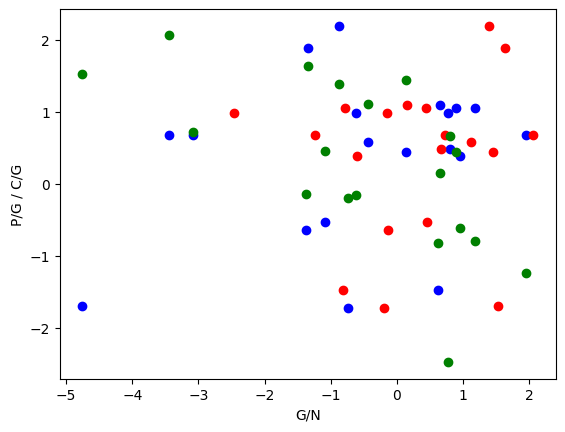

In [ ]:


class ModelW:
  def __init__(self, nombre, model):
    self.nombre=nombre
    self.model=model
    self.estimaciones = None
    self.combinado = None

  def fit(self, X, y):
    self.model.fit(X,y)


  def predict(self, X):
    return self.model.predict(X)



  def ejecutar(self):
    if os.path.exists(f'output/{self.nombre}')is False:
      os.makedirs(f'output/{self.nombre}')

    self.estimaciones = pd.DataFrame(columns=["est_C/G",
                                              "est_G/N",
                                              "est_P/G"],
                                     data=self.predict(t_espe_std))
    self.estimaciones.insert(loc=0, column="WL", value=datos_imputados["WL"])

    self.combinado =datos.copy()
    self.indices_vacios = self.combinado[self.combinado["C/G"].isna()].index
    self.combinado['STATE']='original'
    self.combinado.loc[self.combinado["C/G"].isna(), 'STATE']= 'estimacion'
    self.combinado.loc[self.combinado["C/G"].isna(), 'C/G']= self.estimaciones.values[:, 1][self.indices_vacios]
    self.combinado.loc[self.combinado["G/N"].isna(), 'G/N']= self.estimaciones.values[:, 2][self.indices_vacios]
    self.combinado.loc[self.combinado["P/G"].isna(), 'P/G']= self.estimaciones.values[:, 3][self.indices_vacios]
    self.combinado =self.combinado[["WL", "STATE", "C/G", "G/N", "P/G"]]
    print(self.combinado)
    return self.combinado


  def guardar(self):
    if not os.path.exists('/content/drive/My Drive/ estimaciones'):
      os.makedirs('/content/drive/My Drive/estimaciones', exist_ok=True)
    if not os.path.exists('/content/drive/My Drive/combinado'):
      os.makedirs('/content/drive/My Drive/combinado')

    self.estimaciones.to_csv(f"/content/drive/My Drive/estimaciones/{self.nombre}_estimaciones.csv", index=False)
    self.combinado.to_csv(f"/content/drive/My Drive/combinado/{self.nombre}_combinado.csv",index=False)

  def get_original_data(self):
    return self.combinado[self.combinado["STATE"] == 'original']
  def get_estimacion_data(self):
    return self.combinado[self.combinado["STATE"] == 'estimacion']

  def graficar(self):
    original_data = self.combinado[self.combinado["STATE"]=='original']
    estimacion_data = self.combinado[self.combinado["STATE"]=='estimacion']

    print("Datos para la grafica 'original': ")
    print(original_data.head())
    print("Datos para la grafica 'estimacion': ")
    print(estimacion_data.head())


    plt.scatter(
        estimacion_data['G/N'],
        estimacion_data["P/G"],
        c='blue',
        label='Original'
    )
    plt.scatter(
        estimacion_data['C/G'],
        estimacion_data["P/G"],
        c='red',
        label='Estimado'
    )

    plt.scatter(
        estimacion_data['G/N'],
        estimacion_data["C/G"],
        c='green',
        label='C/G'
    )
    plt.xlabel('G/N')
    plt.ylabel('P/G / C/G')
    plt.show()


modelos = {
    "linear": LinearRegression()
}

for m in modelos:
  modelo = ModelW(m, modelos [m])
  modelo.fit(X, y.values)
  modelo.ejecutar()
  modelo.guardar()

  error=(modelo.combinado.values[c_comp_std.index][:, 3:6]- modelo.estimaciones.values[c_comp_std.index][:, 2:5]).astype(float)
  print(error)

  modelo.graficar()






In [ ]:
# Crear una instancia de la clase ModelW
modelo = ModelW("linear", LinearRegression())

# Ajustar el modelo con los datos de entrada
modelo.fit(X, y.values)

# Ejecutar el modelo para generar estimaciones
modelo.ejecutar()
datos_generados = modelo.ejecutar()
print(datos_generados)



           WL       STATE       C/G       G/N       P/G
0   AGUACLARA    original       0.0     1.068    0.0398
1     AGUAL02    original       0.0    0.8207    0.6335
2       ARCHT    original    0.0001    1.1932    0.4353
3        ASUS  estimacion  0.660283  0.802998  0.481528
4      BALREP    original       0.0    1.0621    0.0297
5        BASE  estimacion -0.151175 -0.622104  0.981591
6          BB  estimacion  1.446567  0.142237  0.436546
7       CAT01    original       0.0    0.7846     0.193
8       CAT02    original       0.0    0.8006    0.4708
9       CHANK  estimacion  1.114557 -0.442812  0.581542
10        CHE  estimacion -0.194803 -0.744389 -1.724341
11        CHP  estimacion  -0.61044  0.958788   0.38336
12         CI  estimacion  1.391816 -0.879817  2.190278
13    CTRON01    original       0.0    0.8397    0.5696
14    CTRON02    original       0.0    0.8368    0.4346
15         GP  estimacion   0.45188 -1.093478  -0.52733
16      HLSJP  estimacion -0.817714  0.623805 -1

<ipython-input-10-ee9e1a613ca5>:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.6602833732582238 -0.15117529070399366 1.4465670410491933
 1.1145567250537363 -0.19480313775359298 -0.6104403428678922
 1.3918163856611634 0.4518804267708014 -0.8177135426350417
 2.0594673024425876 1.6342405197414631 -1.2340768843059846
 0.14971696743481 1.5288087063908085 -2.4687048317513 -0.1404505463732667
 0.4435812567577886 0.7254022251854062 -0.7867350469973996]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.combinado.loc[self.combinado["C/G"].isna(), 'C/G']= self.estimaciones.values[:, 1][self.indices_vacios]
<ipython-input-10-ee9e1a613ca5>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.8029981902018823 -0.6221035616476833 0.1422371068268286
 -0.4428116859383256 -0.7443889140523625 0.9587879582476515

In [ ]:
import pandas as pd



# Eliminar la columna 'STATE'
datos_sin_state = datos_generados.drop(columns=['STATE'])

# Filtrar solo las filas donde 'STATE' es 'estimacion'
datos_estimacion = datos_generados[datos_generados['STATE'] == 'estimacion']

# Eliminar la columna 'STATE' en el DataFrame filtrado
datosEs = datos_estimacion.drop(columns=['STATE'])

# Mostrar el resultado
print(datosEs)


       WL       C/G       G/N       P/G
3    ASUS  0.660283  0.802998  0.481528
5    BASE -0.151175 -0.622104  0.981591
6      BB  1.446567  0.142237  0.436546
9   CHANK  1.114557 -0.442812  0.581542
10    CHE -0.194803 -0.744389 -1.724341
11    CHP  -0.61044  0.958788   0.38336
12     CI  1.391816 -0.879817  2.190278
15     GP   0.45188 -1.093478  -0.52733
16  HLSJP -0.817714  0.623805 -1.468676
17   HLSM  2.059467 -3.439177  0.673511
19    LGG  1.634241 -1.340878  1.880494
21  LLMAS -1.234077  1.953212  0.677079
27     MP  0.149717  0.645267  1.088824
29    NLS  1.528809 -4.755513 -1.697416
37    SAP -2.468705  0.773872  0.980664
39   SJMS -0.140451 -1.372159 -0.634033
40    SUC  0.443581  0.892197  1.051166
41     TC  0.725402 -3.090209  0.680733
45   Tosm -0.786735  1.178633  1.045827


In [ ]:

import pandas as pd
data_numeric = datos_generados.drop(columns=['WL', 'STATE'])
data_numeric[['C/G', 'G/N', 'P/G']] = data_numeric[['C/G', 'G/N', 'P/G']].astype(float)
data_numeric = data_numeric[(data_numeric[['C/G', 'G/N', 'P/G']] != 0).any(axis=1)]

print(data_numeric)

         C/G       G/N       P/G
0   0.000000  1.068000  0.039800
1   0.000000  0.820700  0.633500
2   0.000100  1.193200  0.435300
3   0.660283  0.802998  0.481528
4   0.000000  1.062100  0.029700
5  -0.151175 -0.622104  0.981591
6   1.446567  0.142237  0.436546
7   0.000000  0.784600  0.193000
8   0.000000  0.800600  0.470800
9   1.114557 -0.442812  0.581542
10 -0.194803 -0.744389 -1.724341
11 -0.610440  0.958788  0.383360
12  1.391816 -0.879817  2.190278
13  0.000000  0.839700  0.569600
14  0.000000  0.836800  0.434600
15  0.451880 -1.093478 -0.527330
16 -0.817714  0.623805 -1.468676
17  2.059467 -3.439177  0.673511
18  0.000000  0.930800  0.819700
19  1.634241 -1.340878  1.880494
20  0.000000  1.253900  0.261100
21 -1.234077  1.953212  0.677079
22  0.000000  0.812300  0.000000
23  0.000000  0.888100  0.530200
24  0.000000  0.888800  0.514100
25  0.000000  0.815500  0.433600
26  0.061900  1.175000  0.144400
27  0.149717  0.645267  1.088824
28  0.000000  0.774400  0.967800
29  1.5288

In [ ]:
import pandas as pd
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalized_data = normalizer.fit_transform(data_numeric)
normalized_df = pd.DataFrame(normalized_data, columns=['C/G', 'G/N', 'P/G'])

print("DataFrame con datos normalizados:")
print(normalized_df)


DataFrame con datos normalizados:
         C/G       G/N       P/G
0   0.000000  0.999306  0.037240
1   0.000000  0.791601  0.611038
2   0.000079  0.939437  0.342723
3   0.576310  0.700874  0.420288
4   0.000000  0.999609  0.027953
5  -0.128998 -0.530843  0.837595
6   0.953142  0.093720  0.287640
7   0.000000  0.971053  0.238865
8   0.000000  0.862001  0.506907
9   0.836216 -0.332227  0.436312
10 -0.103167 -0.394226 -0.913205
11 -0.508899  0.799302  0.319592
12  0.507930 -0.321081  0.799321
13  0.000000  0.827566  0.561369
14  0.000000  0.887449  0.460905
15  0.348844 -0.844147 -0.407090
16 -0.456062  0.347914 -0.819123
17  0.506653 -0.846078  0.165692
18  0.000000  0.750475  0.660899
19  0.577612 -0.473925  0.664649
20  0.000000  0.979001  0.203858
21 -0.512581  0.811278  0.281229
22  0.000000  1.000000  0.000000
23  0.000000  0.858625  0.512604
24  0.000000  0.865624  0.500695
25  0.000000  0.882952  0.469464
26  0.052216  0.991179  0.121810
27  0.117472  0.506295  0.854322
28  0.000

In [ ]:
from sklearn.model_selection import train_test_split

X, y = datos_imputados.iloc[:, 1:].values, datos_imputados.iloc[:, 0].values
X_train, y_train = X, y
X_test, y_test = None, None

# Comprobar las formas de X_train y X_test
print("Forma de X_train:", X_train.shape)




Forma de X_train: (47, 424)


In [ ]:
print(X_train)

[[ 0.            1.068         0.0398       ... -0.0381207
  -0.0389876    -0.0395914   ]
 [ 0.            0.8207        0.6335       ... -0.0427675
  -0.0427559    -0.0431693   ]
 [ 0.0001        1.1932        0.4353       ... -0.0416184
  -0.0418931    -0.0422572   ]
 ...
 [ 0.            1.1492        0.2887       ... -0.0432764
  -0.0434892    -0.0437136   ]
 [ 0.0142821429  0.9155464286  0.3762321429 ... -0.0405338
  -0.0404955    -0.040945    ]
 [ 0.            0.4741        0.5658       ... -0.0214841
  -0.0160998    -0.0153677   ]]


In [ ]:
from sklearn.preprocessing import Normalizer

data = X_train
normalizer = Normalizer()

normalized_X_train = normalizer.fit_transform(data)
print("\nDatos normalizados:")
print(normalized_X_train)
normalized_data.shape


Datos normalizados:
[[ 0.            0.2161364246  0.0080545222 ... -0.007714674
  -0.0078901128 -0.0080123068]
 [ 0.            0.164167693   0.1267213763 ... -0.0085549431
  -0.0085526227 -0.0086353167]
 [ 0.0000199444  0.2379769778  0.086818118  ... -0.008300554
  -0.0083553414 -0.0084279591]
 ...
 [ 0.            0.2296363302  0.0576888344 ... -0.0086476102
  -0.0086901325 -0.0087349727]
 [ 0.002896254   0.1856622654  0.0762955431 ... -0.0082197875
  -0.0082120208 -0.0083031742]
 [ 0.            0.0865174079  0.103251528  ... -0.0039205835
  -0.0029380151 -0.0028044159]]


(47, 3)

In [ ]:
X_train.shape

(47, 424)

In [ ]:
#Estandarizamos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(normalized_X_train)

In [ ]:
print(X_train_std)

[[-0.3754100453  1.1789457671 -1.8086407866 ... -0.292436685
  -0.3322406102 -0.3776916643]
 [-0.3754100453 -0.6496699081  1.412086404  ... -0.5261881269
  -0.5131270249 -0.5415467901]
 [-0.3728186154  1.9474459136  0.3290753996 ... -0.4554205423
  -0.4592629033 -0.487010565 ]
 ...
 [-0.3754100453  1.6539648439 -0.4615200574 ... -0.55196686
  -0.5506716022 -0.5677569036]
 [ 0.0009074568  0.106656268   0.0434830699 ... -0.4329524098
  -0.4201317852 -0.4541914338]
 [-0.3754100453 -3.3819384082  0.7750932081 ...  0.7630276613
   1.0198405731  0.9920131138]]


In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)

In [ ]:
print("Forma de X_train después de la estandarización:", X_train_std.shape)
print("Forma de X_train después de PCA:", X_train_pca.shape)

Forma de X_train después de la estandarización: (47, 424)
Forma de X_train después de PCA: (47, 2)


In [ ]:
X_train_pca

array([[ 11.1868854729,  -1.8721484451],
       [-20.7962465882,  -2.6826246723],
       [-20.2091008221,  -3.0037664241],
       [  1.9910452306,  12.2797067989],
       [ -9.3644186104,  -5.6634461327],
       [ -9.2229132175,   2.0208533541],
       [ -7.9699575933,  -6.1474873028],
       [  6.2525262529,  -0.7104238883],
       [ -2.7732298551,  -5.4389900965],
       [ -4.1579405072,  -2.938642491 ],
       [ 30.6778517423,  -4.6629448976],
       [ -7.4136306249,  -2.8445922247],
       [-15.6053369724,  -0.3872628774],
       [  3.6311156309,  -3.411926052 ],
       [ -4.6934486802,  -4.0685688248],
       [  7.1300528407,   7.8356621981],
       [ 18.2623320239,  -5.3122204519],
       [-14.2095069469,   1.0000071452],
       [-17.8158298198,  -5.9390071058],
       [ -9.1408936843,   8.2637847772],
       [-31.9194974765,  -4.3695305141],
       [ -5.3534755711,  -2.5245485996],
       [ 30.0832880168,   3.9817972143],
       [  1.5014061921,   8.5665856915],
       [ -1.6037

[[  0.            -0.          ]
 [ -0.            -0.          ]
 [ -0.0020209101  -0.0003003766]
 [  1.3146540612   8.1080862278]
 [ -0.            -0.          ]
 [  1.3942765868  -0.3055030933]
 [-11.5290779731  -8.8927525175]
 [  0.            -0.          ]
 [ -0.            -0.          ]
 [ -4.6342605547  -3.2752837508]
 [ -5.9761417789   0.9083562972]
 [  4.5255792205   1.736453853 ]
 [-21.7197637019  -0.5389988184]
 [  0.            -0.          ]
 [ -0.            -0.          ]
 [  3.2219313206   3.5407823781]
 [-14.933356216    4.343874605 ]
 [-29.264014941    2.0594820178]
 [ -0.            -0.          ]
 [-14.9384188456  13.5050119294]
 [ -0.            -0.          ]
 [  6.6066004529   3.1154870701]
 [  0.             0.          ]
 [  0.             0.          ]
 [ -0.             0.          ]
 [ -0.            -0.          ]
 [ -0.8989640615  -0.3683402878]
 [ -0.6244778135   0.2714575497]
 [ -0.            -0.          ]
 [ 87.0587793499 -15.3202274183]
 [  0.    

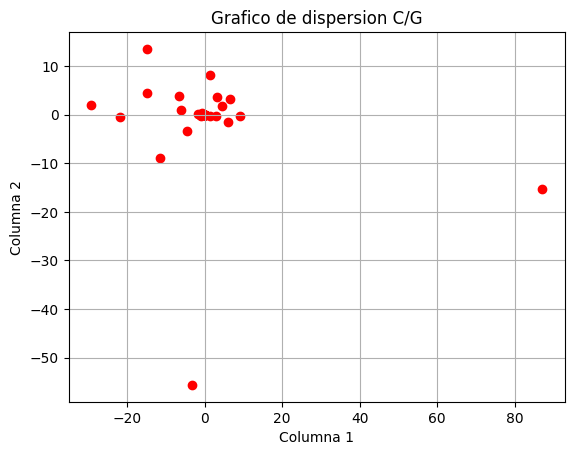

In [ ]:
import numpy as np

A = X_train_pca
B = datos_generados['C/G'].values.reshape(-1, 1)

R_cg = np.zeros((47, 2))

# Realizar la multiplicación elemento por elemento
for i in range(A.shape[1]):  # Iterar sobre las columnas de X_train_pca
    R_cg[:, i] = A[:, i] * B[:, 0]

# Imprimir el resultado
print(R_cg)
print("Forma de R:", R_cg.shape)

plt.scatter(R_cg[:, 0], R_cg[:, 1], c='red')
plt.title('Grafico de dispersion C/G')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.grid(True)
plt.show()
plt.savefig("grafica1.eps", format='eps')
plt.close()


[[  11.9475936851   -1.9994545394]
 [ -17.0674795749   -2.2016300686]
 [ -24.1134991009   -3.5840940972]
 [   1.5988057168    9.8605823358]
 [  -9.9459490061   -6.0151461376]
 [   5.7376071614   -1.2571800691]
 [  -1.1336237096   -0.8744008082]
 [   4.9057320981   -0.5573985828]
 [  -2.220247822    -4.3544554713]
 [   1.841184646     1.3012652358]
 [ -22.8362527439    3.4710444886]
 [  -7.10809977     -2.7273607712]
 [  13.7298402675    0.3407204508]
 [   3.0490477953   -2.8649943058]
 [  -3.9274778556   -3.4045783926]
 [  -7.7965551079   -8.5681233364]
 [  11.3921343659   -3.3137897772]
 [  48.8690046994   -3.4392012377]
 [ -16.5829743963   -5.5280278141]
 [  12.2568257717  -11.0807294918]
 [ -40.0238578858   -5.4789543116]
 [ -10.4564728084   -4.9309786576]
 [  24.436654856     3.2344138772]
 [   1.3333988392    7.6079847527]
 [  -1.4253744393    7.5268555149]
 [  -0.6266169715   -2.647172102 ]
 [ -17.0643420405   -6.9919198412]
 [  -2.6914448292    1.169958328 ]
 [ -12.1977400957   

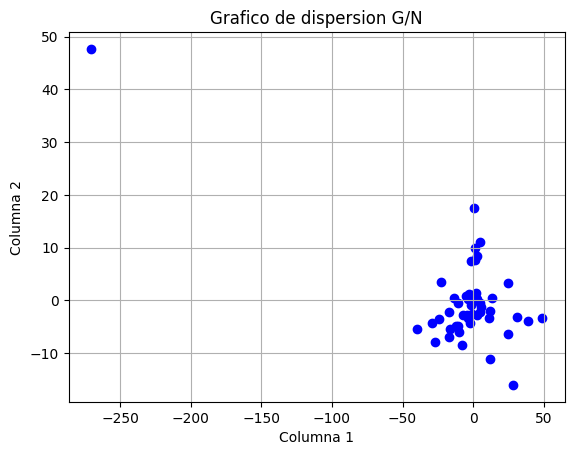

In [ ]:
import numpy as np

A = X_train_pca
B = datos_generados['G/N'].values.reshape(-1, 1)

R_gn = np.zeros((47, 2))

# Realizar la multiplicación elemento por elemento
for i in range(A.shape[1]):  # Iterar sobre las columnas de X_train_pca
    R_gn[:, i] = A[:, i] * B[:, 0]

# Imprimir el resultado
print(R_gn)
print("Forma de R:", R_gn.shape)

plt.scatter(R_gn[:, 0], R_gn[:, 1], c='blue')
plt.title('Grafico de dispersion G/N')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.grid(True)
plt.show()
plt.savefig("grafica2.eps", format='eps')
plt.close()

[[  0.4452380418  -0.0745115081]
 [-13.1744222136  -1.6994427299]
 [ -8.7970215879  -1.3075395244]
 [  0.9587447516   5.9130271197]
 [ -0.2781232327  -0.1682043501]
 [ -9.05312548     1.9836507793]
 [ -3.4792541236  -2.6836617758]
 [  1.2067375668  -0.1371118104]
 [ -1.3056366158  -2.5606765375]
 [ -2.4180158333  -1.7089431797]
 [-52.8990643107   8.0405050552]
 [ -2.8420930878  -1.0905042763]
 [-34.1800215486  -0.8482132439]
 [  2.0682834633  -1.9434330792]
 [ -2.0397727964  -1.7682000113]
 [ -3.7598915982  -4.1319806631]
 [-26.8214570202   7.8019330908]
 [ -9.5702627014   0.6735160565]
 [-14.6036357033  -4.8682041246]
 [-17.1893947737  15.5399968281]
 [ -8.3341807911  -1.1408844172]
 [ -3.6247257524  -1.7093187782]
 [  0.             0.          ]
 [  0.796045563    4.5420037337]
 [ -0.8244655707   4.3536863414]
 [ -0.3331712064  -1.4074970245]
 [ -2.0970987154  -0.8592623192]
 [ -4.5415446569   1.9741879662]
 [-15.2440248769  -6.0098468593]
 [-96.6602218406  17.0098477369]
 [  1.6885

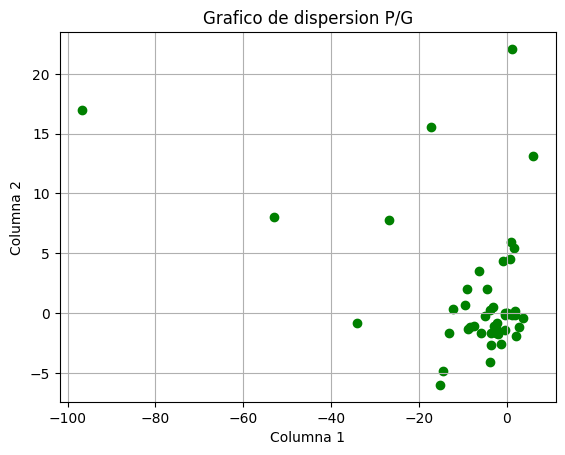

In [ ]:
import numpy as np

A = X_train_pca
B = datos_generados['P/G'].values.reshape(-1, 1)

R_pg = np.zeros((47, 2))

# Realizar la multiplicación elemento por elemento
for i in range(A.shape[1]):  # Iterar sobre las columnas de X_train_pca
    R_pg[:, i] = A[:, i] * B[:, 0]

# Imprimir el resultado
print(R_pg)
print("Forma de R:", R_pg.shape)

plt.scatter(R_pg[:, 0], R_pg[:, 1], c='green')
plt.title('Grafico de dispersion P/G')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.grid(True)
plt.show()
plt.savefig("grafica3.eps", format='eps')
plt.close()

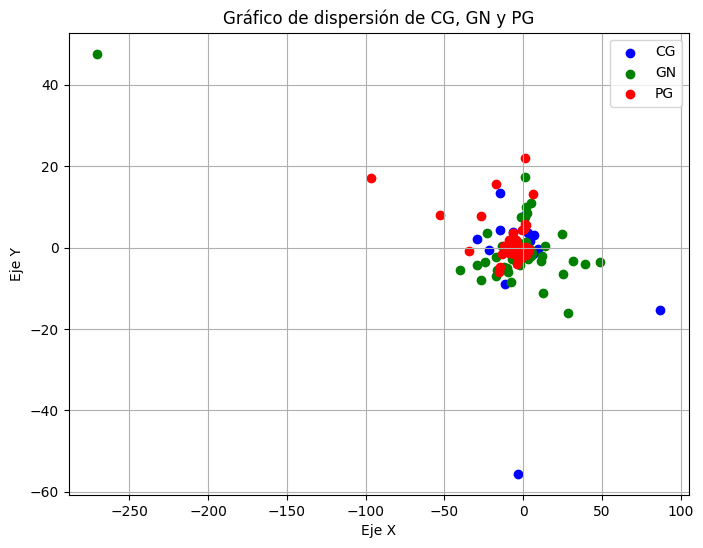

In [ ]:
import numpy as np

CG= R_cg
GN= R_gn
PG= R_pg


# Extrae las coordenadas x e y de cada arreglo
Ax = [x[0] for x in CG]
Ay = [x[1] for x in CG]

Bx = [x[0] for x in GN]
By = [x[1] for x in GN]

Cx = [x[0] for x in PG]
Cy = [x[1] for x in PG]



plt.figure(figsize=(8, 6))
plt.scatter(Ax, Ay, label='CG', color='blue')
plt.scatter(Bx, By, label='GN', color='green')
plt.scatter(Cx, Cy, label='PG', color='red')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión de CG, GN y PG')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

In [ ]:
print(X_train_pca)


[[ 11.1868854729  -1.8721484451]
 [-20.7962465882  -2.6826246723]
 [-20.2091008221  -3.0037664241]
 [  1.9910452306  12.2797067989]
 [ -9.3644186104  -5.6634461327]
 [ -9.2229132175   2.0208533541]
 [ -7.9699575933  -6.1474873028]
 [  6.2525262529  -0.7104238883]
 [ -2.7732298551  -5.4389900965]
 [ -4.1579405072  -2.938642491 ]
 [ 30.6778517423  -4.6629448976]
 [ -7.4136306249  -2.8445922247]
 [-15.6053369724  -0.3872628774]
 [  3.6311156309  -3.411926052 ]
 [ -4.6934486802  -4.0685688248]
 [  7.1300528407   7.8356621981]
 [ 18.2623320239  -5.3122204519]
 [-14.2095069469   1.0000071452]
 [-17.8158298198  -5.9390071058]
 [ -9.1408936843   8.2637847772]
 [-31.9194974765  -4.3695305141]
 [ -5.3534755711  -2.5245485996]
 [ 30.0832880168   3.9817972143]
 [  1.5014061921   8.5665856915]
 [ -1.6037066149   8.4685593102]
 [ -0.7683837787  -3.2460724734]
 [-14.5228442898  -5.9505700777]
 [ -4.1710557208   1.8131381793]
 [-15.7512139666  -6.2098024998]
 [ 56.9455020671 -10.0210231367]
 [  3.2341

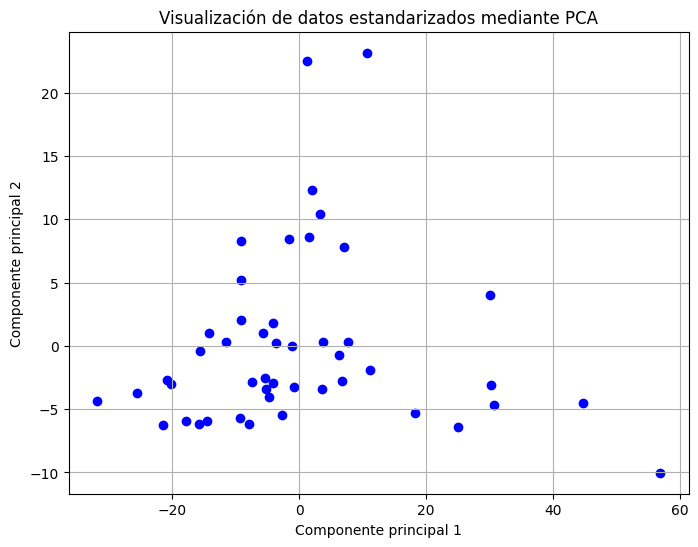

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter([x[0] for x in X_train_pca], [x[1] for x in X_train_pca], color='blue')
plt.title('Visualización de datos estandarizados mediante PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.show()
plt.savefig("grafica5.eps", format='eps')
plt.close()

In [ ]:
X_train_pca.shape

(47, 2)

In [ ]:
import numpy as np
cov_mat = np.cov(X_train_std)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues\n%s'% eigen_vals)


Eigenvalues
[18.8722768378  4.1547488725  1.7767655967  1.03090924    0.5552418583
  0.469645928   0.3171834336  0.2625327     0.2427196467  0.1976335491
  0.1741517858  0.1688040949  0.1391549021  0.1336581901  0.1247495821
  0.1086083729  0.0996711659  0.0983803617  0.0902285367  0.0845091087
  0.080881793   0.0697461866  0.0656731121  0.0568266722  0.0532422819
  0.0478256124  0.0468887998  0.0449199628  0.0410579963 -0.
  0.0362093214  0.0029035945  0.031202609   0.0289737732  0.0275081365
  0.0267878958  0.0219795303  0.0195005438  0.0187499163  0.0084502508
  0.0098137841  0.0103648075  0.011956335   0.0160590964  0.0132481178
  0.0144781734  0.0140566572]


In [ ]:
tot = sum(eigen_vals)
var_exp= [(i/tot)for i in
          sorted (eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
print(len(cum_var_exp))

47


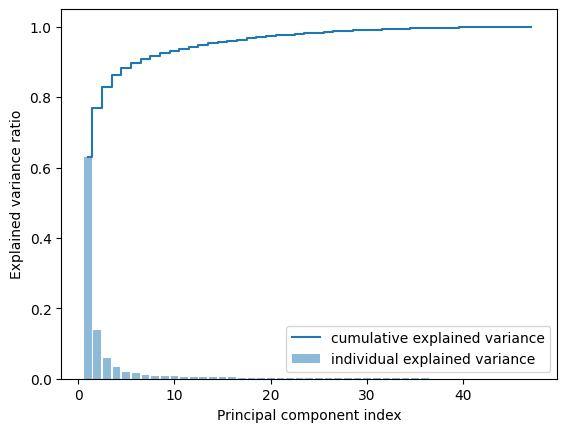

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.savefig("explained-variance.pdf")
plt.show()



In [ ]:

#Lista de tuplas
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]


#Ordena las tuplas

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
print(X_train_std)
X_train_std.shape

[[-0.3754100453  1.1789457671 -1.8086407866 ... -0.292436685
  -0.3322406102 -0.3776916643]
 [-0.3754100453 -0.6496699081  1.412086404  ... -0.5261881269
  -0.5131270249 -0.5415467901]
 [-0.3728186154  1.9474459136  0.3290753996 ... -0.4554205423
  -0.4592629033 -0.487010565 ]
 ...
 [-0.3754100453  1.6539648439 -0.4615200574 ... -0.55196686
  -0.5506716022 -0.5677569036]
 [ 0.0009074568  0.106656268   0.0434830699 ... -0.4329524098
  -0.4201317852 -0.4541914338]
 [-0.3754100453 -3.3819384082  0.7750932081 ...  0.7630276613
   1.0198405731  0.9920131138]]


(47, 424)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))


print('Matriz W: \n', w)


print(np.size(w))
w.shape

Matriz W: 
 [[-0.1103927656 -0.0007687793]
 [ 0.1732016381  0.1183678041]
 [ 0.1134260289  0.0121206672]
 [ 0.028288511  -0.277510953 ]
 [ 0.0510669994  0.131501611 ]
 [ 0.0882142563 -0.0181941667]
 [ 0.0523516359  0.1689647571]
 [-0.0288679904  0.0606724778]
 [ 0.0193566318  0.1625945176]
 [ 0.0255731565  0.0690614497]
 [-0.2729554326  0.0424171035]
 [ 0.0565579412  0.0884972825]
 [ 0.1458985311  0.074351916 ]
 [-0.0426973722  0.0719068302]
 [ 0.038646387   0.1319540759]
 [-0.0342476771 -0.194135714 ]
 [-0.170695049   0.0831018259]
 [ 0.1501828556  0.0711953462]
 [ 0.0899498181  0.0905028263]
 [ 0.1114251601 -0.156528279 ]
 [ 0.209980436   0.0727718626]
 [ 0.0439777914  0.085446355 ]
 [-0.2070993381 -0.0848995146]
 [ 0.0118452684 -0.2042434607]
 [ 0.0381269526 -0.1952531153]
 [ 0.0084086198  0.1030956342]
 [ 0.0664080295  0.090578425 ]
 [ 0.0545209833 -0.0043167625]
 [ 0.0694460074  0.0877214167]
 [-0.5366436798  0.0350906285]
 [ 0.0120101604 -0.2346092266]
 [ 0.0183968512  0.02453132

(47, 2)

In [ ]:
w.shape

(47, 2)

In [ ]:
#Estandarizamos
scaler = StandardScaler()
w_std = scaler.fit_transform(w)

In [ ]:
w_std

array([[-0.7568146711, -0.0052704854],
       [ 1.1874106074,  0.8114887807],
       [ 0.7776096769,  0.0830951076],
       [ 0.1939362606, -1.9025192414],
       [ 0.3500977096,  0.9015296245],
       [ 0.6047664718, -0.1247329224],
       [ 0.3589047338,  1.1583640145],
       [-0.1979089712,  0.4159495513],
       [ 0.1327023818,  1.1146918529],
       [ 0.1753207283,  0.4734614456],
       [-1.8712881669,  0.2907970108],
       [ 0.38774171  ,  0.6067068019],
       [ 1.0002299357,  0.5097310547],
       [-0.2927184359,  0.4929683912],
       [ 0.2649462806,  0.9046315677],
       [-0.2347902452, -1.3309274006],
       [-1.1702262978,  0.5697174149],
       [ 1.029601785 ,  0.4880907025],
       [ 0.6166648843,  0.6204561178],
       [ 0.7638924115, -1.0731038162],
       [ 1.4395533419,  0.4988987546],
       [ 0.3014965482,  0.585790697 ],
       [-1.4198015302, -0.5820417478],
       [ 0.0812070686, -1.4002226208],
       [ 0.261385218 , -1.3385879179],
       [ 0.0576465931,  0

[[-0.           -0.          ]
 [ 0.            0.          ]
 [ 0.000077761   0.0000083095]
 [ 0.1280528883 -1.2562018224]
 [ 0.            0.          ]
 [-0.0914257472  0.0188565358]
 [ 0.5191797587  1.6756512049]
 [-0.            0.          ]
 [ 0.            0.          ]
 [ 0.1954048967  0.5276996383]
 [ 0.3645328066 -0.0566481702]
 [-0.2366931824 -0.3703583082]
 [ 1.392136414   0.7094520342]
 [-0.            0.          ]
 [ 0.            0.          ]
 [-0.1060971162 -0.6014200418]
 [ 0.9569098917 -0.4658656456]
 [ 2.1204312107  1.0052068424]
 [ 0.            0.          ]
 [ 1.2483839316 -1.7537097383]
 [ 0.            0.          ]
 [-0.3720699209 -0.7229107582]
 [-0.           -0.          ]
 [ 0.           -0.          ]
 [ 0.           -0.          ]
 [ 0.            0.          ]
 [ 0.0281812448  0.0384383151]
 [ 0.0559607634 -0.0044307587]
 [ 0.            0.          ]
 [-5.6245540588  0.3677843315]
 [ 0.           -0.          ]
 [ 0.            0.          ]
 [-0.179

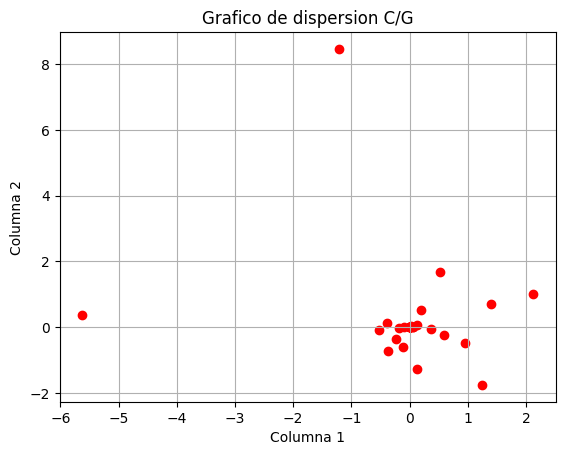

In [ ]:
import numpy as np

# Multiplicacion de C/G * W
A = w_std
B = datos_generados['C/G'].values.reshape(-1, 1)

R_w_cg = np.zeros((47, 2))

# Realizar la multiplicación elemento por elemento
for i in range(A.shape[1]):  # Iterar sobre las columnas de X_train_pca
    R_w_cg[:, i] = A[:, i] * B[:, 0]

# Imprimir el resultado
print(R_w_cg)
print("Forma de R:", R_w_cg.shape)

plt.scatter(R_w_cg[:, 0], R_w_cg[:, 1], c='red')
plt.title('Grafico de dispersion C/G')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.grid(True)
plt.show()
plt.savefig("grafica7.eps", format='eps')
plt.close()

[[-0.8082780687 -0.0056288784]
 [ 0.9745078855  0.6659888423]
 [ 0.9278438665  0.0991490824]
 [ 0.1557304663 -1.5277195076]
 [ 0.3718387773  0.9575146142]
 [-0.3762273761  0.0775967953]
 [ 0.051049571   0.1647623461]
 [-0.1552793788  0.3263540179]
 [ 0.1062415269  0.8924222974]
 [-0.0776340673 -0.209654261 ]
 [ 1.3929661665 -0.2164660711]
 [ 0.3717620825  0.5817031759]
 [-0.8800192699 -0.4484700313]
 [-0.2457956706  0.4139455581]
 [ 0.2217070476  0.7569956958]
 [ 0.256737941   1.4553396806]
 [-0.7299930373  0.3553925825]
 [-3.5409824322 -1.678630154 ]
 [ 0.5739916743  0.5775205544]
 [-1.0242867404  1.4389015958]
 [ 1.8050559355  0.6255691484]
 [ 0.5888866805  1.1441734277]
 [-1.153304783  -0.4727925117]
 [ 0.0721199976 -1.2435377095]
 [ 0.2323191818 -1.1897369414]
 [ 0.0470107967  0.5763856618]
 [ 0.5349428528  0.7296449151]
 [ 0.2411860022 -0.0190961831]
 [ 0.3686901675  0.465714661 ]
 [17.4957408308 -1.1440301362]
 [ 0.0666275143 -1.3015171373]
 [ 0.1108364157  0.1477950555]
 [-1.981

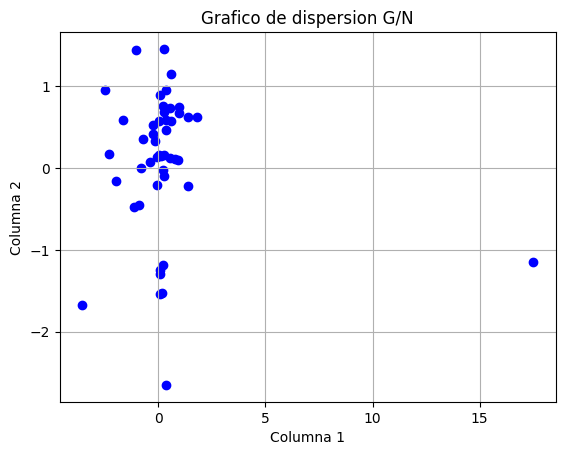

In [ ]:
import numpy as np

# Multiplicacion de G/N * W
A = w_std
B = datos_generados['G/N'].values.reshape(-1, 1)

R_w_gn = np.zeros((47, 2))

# Realizar la multiplicación elemento por elemento
for i in range(A.shape[1]):  # Iterar sobre las columnas de X_train_pca
    R_w_gn[:, i] = A[:, i] * B[:, 0]

# Imprimir el resultado
print(R_w_gn)
print("Forma de R:", R_w_gn.shape)

plt.scatter(R_w_gn[:, 0], R_w_gn[:, 1], c='blue')
plt.title('Grafico de dispersion G/N')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.grid(True)
plt.show()
plt.savefig("grafica8.eps", format='eps')
plt.close()

[[-0.0301212239 -0.0002097653]
 [ 0.7522246198  0.5140781426]
 [ 0.3384934924  0.0361713003]
 [ 0.0933858102 -0.9161169769]
 [ 0.010397902   0.0267754298]
 [ 0.5936331208 -0.1224366717]
 [ 0.1566784717  0.5056793248]
 [-0.0381964314  0.0802782634]
 [ 0.0624762813  0.5247969243]
 [ 0.1019563161  0.2753375788]
 [ 3.2267381014 -0.5014330829]
 [ 0.1486448529  0.2325874184]
 [ 2.1907813216  1.1164525614]
 [-0.1667324211  0.2807947956]
 [ 0.1151456536  0.3931528793]
 [ 0.1238119674  0.7018381018]
 [ 1.7186838083 -0.8367305521]
 [ 0.6934483791  0.3287345763]
 [ 0.5054802057  0.5085878798]
 [ 1.4364950168 -2.0179651756]
 [ 0.3758673776  0.1302624648]
 [ 0.2041369738  0.3966265647]
 [-0.           -0.          ]
 [ 0.0430559878 -0.7423980335]
 [ 0.1343781406 -0.6881680486]
 [ 0.0249955628  0.3064633022]
 [ 0.0657410621  0.0896687028]
 [ 0.4069773186 -0.032222904 ]
 [ 0.4607674897  0.5820230487]
 [ 6.2448686639 -0.4083461236]
 [ 0.0429884148 -0.839745548 ]
 [ 0.0499066565  0.0665481378]
 [-0.232

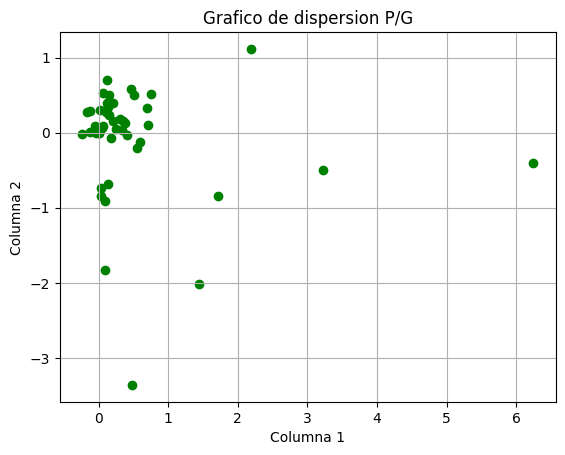

In [ ]:
import numpy as np

# Multiplicacion de P/G * W
A = w_std
B = datos_generados['P/G'].values.reshape(-1, 1)

R_w_pg = np.zeros((47, 2))

# Realizar la multiplicación elemento por elemento
for i in range(A.shape[1]):  # Iterar sobre las columnas de X_train_pca
    R_w_pg[:, i] = A[:, i] * B[:, 0]

# Imprimir el resultado
print(R_w_pg)
print("Forma de R:", R_w_pg.shape)

plt.scatter(R_w_pg[:, 0], R_w_pg[:, 1], c='green')
plt.title('Grafico de dispersion P/G')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.grid(True)
plt.show()
plt.savefig("grafica9.eps", format='eps')
plt.close()

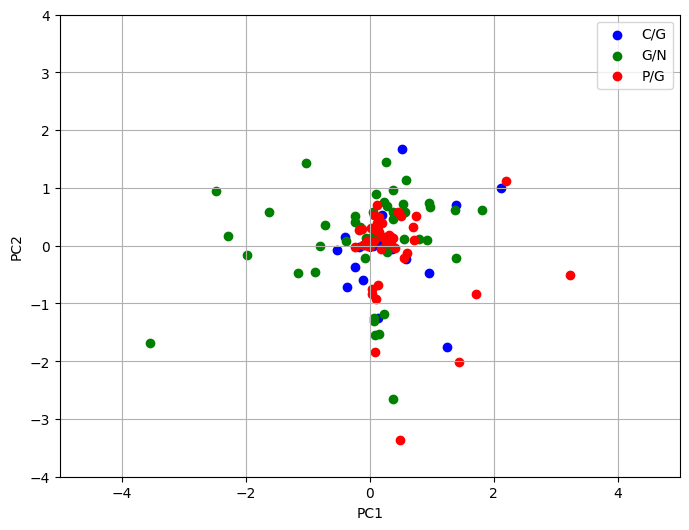

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Suponiendo que WCG, WGN y WPG son arreglos de puntos en el formato [(x1, y1), (x2, y2), ...]

# Función para filtrar puntos dentro de un rango en x e y
def filter_points(points, x_range, y_range):
    filtered_points = []
    for point in points:
        x, y = point
        if x_range[0] <= x <= x_range[1] and y_range[0] <= y <= y_range[1]:
            filtered_points.append(point)
    return filtered_points

# Filtrar los puntos según los rangos especificados
WCG_filtered = filter_points(R_w_cg, (-5, 5), (-4, 4))
WGN_filtered = filter_points(R_w_gn, (-5, 5), (-4, 4))
WPG_filtered = filter_points(R_w_pg, (-5, 5), (-4, 4))

# Extraer las coordenadas x e y de cada arreglo filtrado
WAx = [x[0] for x in WCG_filtered]
WAy = [x[1] for x in WCG_filtered]

WBx = [x[0] for x in WGN_filtered]
WBy = [x[1] for x in WGN_filtered]

WCx = [x[0] for x in WPG_filtered]
WCy = [x[1] for x in WPG_filtered]

# Graficar los puntos filtrados
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(WAx, WAy, label='C/G', color='blue')
ax.scatter(WBx, WBy, label='G/N', color='green')
ax.scatter(WCx, WCy, label='P/G', color='red')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
#ax.set_title('Gráfico de dispersión de CG, GN y PG (Filtrado)')
ax.set_xlim(-5, 5)
ax.set_ylim(-4, 4)
ax.legend()
ax.grid(True)

# Mostrar la gráfica para verificar que se generó correctamente
plt.show()

# Guardar la gráfica en formato PDF
with PdfPages("grafico11.pdf") as pdf:
    pdf.savefig(fig)  # Guardar la figura actual
plt.close(fig)

In [ ]:
R_w_cg.shape

(47, 2)

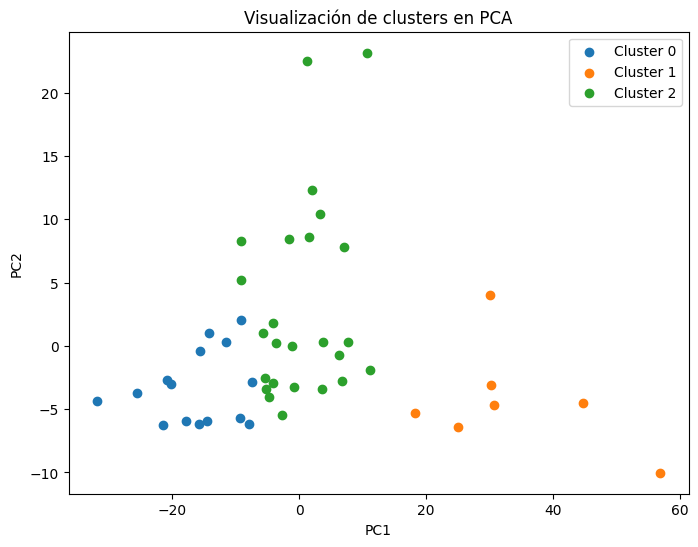

In [ ]:
from sklearn.cluster import KMeans

# Establecer el valor de n_init explícitamente para evitar la advertencia
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X_train_pca)

cluster_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster_label in np.unique(cluster_labels):
    plt.scatter(X_train_pca[cluster_labels == cluster_label, 0],
                X_train_pca[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Visualización de clusters en PCA')
plt.show()


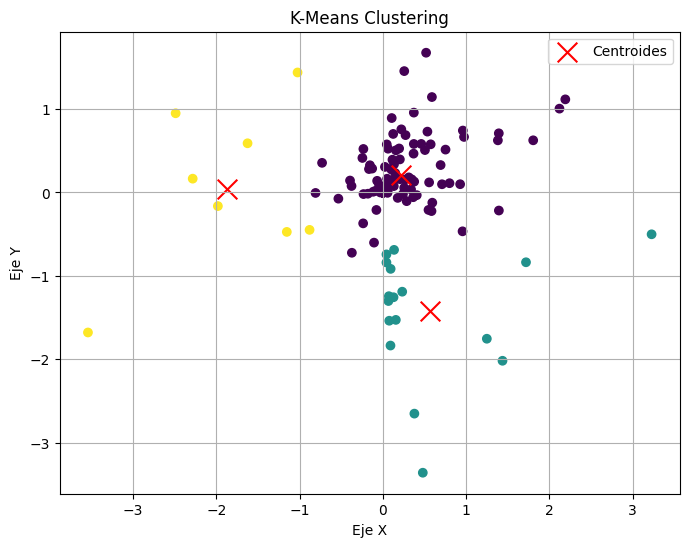

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans

combined_data = np.concatenate((WCG_filtered, WGN_filtered, WPG_filtered))

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10)  # Establece explícitamente n_init para evitar la advertencia
kmeans.fit(combined_data)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(combined_data[:, 0], combined_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroides')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

# Guardar la gráfica en formato PDF
with PdfPages("grafico12.pdf") as pdf:
    pdf.savefig(fig)  # Guardar la figura actual
plt.close(fig)


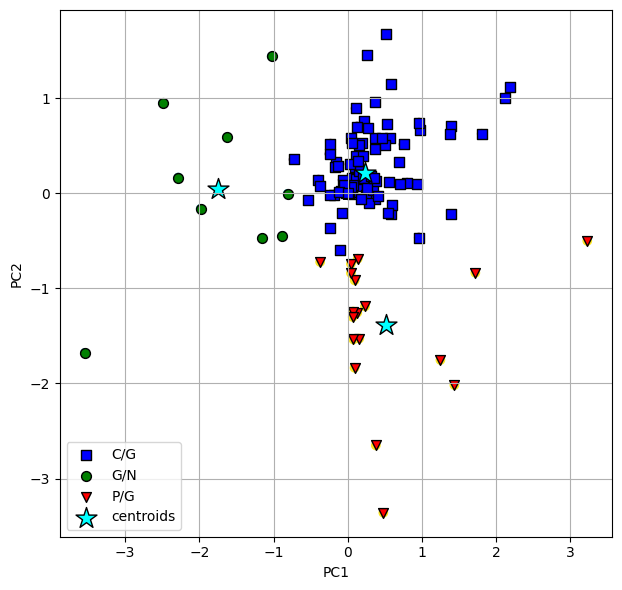

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Genera datos de muestra utilizando make_blobs
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

# Aplica K-Means a los datos generados
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

# Combina los datos filtrados en un solo conjunto de datos
combined_data = np.concatenate((WCG_filtered, WGN_filtered, WPG_filtered))

# Aplica K-Means a los datos combinados
num_clusters = 3
kmeans_combined = KMeans(n_clusters=num_clusters, n_init=10)
kmeans_combined.fit(combined_data)
labels_combined = kmeans_combined.labels_

# Grafica los puntos y los centroides de los clusters para los datos generados
plt.figure(figsize=(12, 6))

# Grafica los puntos y los centroides de los clusters para los datos combinados
plt.subplot(1, 2, 2)
plt.scatter(combined_data[:, 0], combined_data[:, 1], c=labels_combined, cmap='viridis')
#plt.scatter(kmeans_combined.cluster_centers_[:, 0], kmeans_combined.cluster_centers_[:, 1], marker='x', s=200, c='magenta', label='Centroides')
#plt.title('Clustering de datos combinados')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)

# Scatter plots de los clusters y centroides para los datos combinados
plt.scatter(combined_data[labels_combined==0, 0],
            combined_data[labels_combined==0, 1],
            s=50, c='blue',
            marker='s', edgecolor='black',
            label='C/G')
plt.scatter(combined_data[labels_combined==1, 0],
            combined_data[labels_combined==1, 1],
            s=50, c='green',
            marker='o', edgecolor='black',
            label='G/N')
plt.scatter(combined_data[labels_combined==2, 0],
            combined_data[labels_combined==2, 1],
            s=50, c='red',
            marker='v', edgecolors='black',
            label='P/G')
plt.scatter(kmeans_combined.cluster_centers_[:, 0],
            kmeans_combined.cluster_centers_[:, 1],
            s=250, marker='*',
            c='cyan', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid(True)

plt.tight_layout()
plt.show()
plt.close()


In [ ]:
datosEs

,WL,C/G,G/N,P/G
3,ASUS,0.660283,0.802998,0.481528
5,BASE,-0.151175,-0.622104,0.981591
6,BB,1.446567,0.142237,0.436546
9,CHANK,1.114557,-0.442812,0.581542
10,CHE,-0.194803,-0.744389,-1.724341
11,CHP,-0.61044,0.958788,0.38336
12,CI,1.391816,-0.879817,2.190278
15,GP,0.45188,-1.093478,-0.52733
16,HLSJP,-0.817714,0.623805,-1.468676
17,HLSM,2.059467,-3.439177,0.673511


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
datosEs = pd.DataFrame({
    'WL': ['ASUS', 'BASE', 'BB', 'CHANK', 'CHE', 'CHP', 'CI', 'GP', 'HLSJP', 'HLSM', 'LGG', 'LLMAS', 'MP', 'NLS', 'SAP', 'SJMS', 'SUC', 'TC', 'Tosm'],
    'C/G': [0.660283, -0.151175, 1.446567, 1.114557, -0.194803, -0.61044, 1.391816, 0.45188, -0.817714, 2.059467, 1.634241, -1.234077, 0.149717, 1.528809, -2.468705, -0.140451, 0.443581, 0.725402, -0.786735],
    'G/N': [0.802998, -0.622104, 0.142237, -0.442812, -0.744389, 0.958788, -0.879817, -1.093478, 0.623805, -3.439177, -1.340878, 1.953212, 0.645267, -4.755513, 0.773872, -1.372159, 0.892197, -3.090209, 1.178633],
    'P/G': [0.481528, 0.981591, 0.436546, 0.581542, -1.724341, 0.38336, 2.190278, -0.52733, -1.468676, 0.673511, 1.880494, 0.677079, 1.088824, -1.697416, 0.980664, -0.634033, 1.051166, 0.680733, 1.045827]

})
numeric_columns = datosEs.select_dtypes(include=['float64', 'int64']).columns

# Asegurarse de que hay columnas numéricas para escalar
if numeric_columns.size == 0:
    raise ValueError("No hay columnas numéricas para escalar.")

# Convertir los valores a sus valores absolutos
datosEs[numeric_columns] = datosEs[numeric_columns].abs()

# Escalar las columnas numéricas usando MinMaxScaler
scaler = MinMaxScaler()
datosEs[numeric_columns] = scaler.fit_transform(datosEs[numeric_columns])

print(datosEs)

       WL       C/G       G/N       P/G
0    ASUS  0.223271  0.143230  0.054329
1    BASE  0.004606  0.104019  0.331078
2      BB  0.560985  0.000000  0.029435
3   CHANK  0.418385  0.065154  0.109680
4     CHE  0.023345  0.130526  0.742137
5     CHP  0.201863  0.177000  0.000000
6      CI  0.537469  0.159882  1.000000
7      GP  0.133761  0.206196  0.079677
8   HLSJP  0.290889  0.104387  0.600645
9    HLSM  0.824230  0.714664  0.160578
10    LGG  0.641592  0.259824  0.828557
11  LLMAS  0.469719  0.392557  0.162552
12     MP  0.003980  0.109040  0.390424
13    NLS  0.596309  1.000000  0.727236
14    SAP  1.000000  0.136917  0.330565
15   SJMS  0.000000  0.266605  0.138730
16    SUC  0.130196  0.162566  0.369583
17     TC  0.251240  0.639019  0.164575
18   Tosm  0.277583  0.224655  0.366628


In [ ]:
import pandas as pd

# DataFrame original
datosEs = pd.DataFrame({
    'WL': ['ASUS', 'BASE', 'BB', 'CHANK', 'CHE', 'CHP', 'CI', 'GP', 'HLSJP', 'HLSM', 'LGG', 'LLMAS', 'MP', 'NLS', 'SAP', 'SJMS', 'SUC', 'TC', 'Tosm'],
    'C/G': [0.223271, 0.004606, 0.560985, 0.418385, 0.023345, 0.201863, 0.537469, 0.133761, 0.290889, 0.824230, 0.641592, 0.469719, 0.003980, 0.596309, 1.000000, 0.000000, 0.130196, 0.251240, 0.277583],
    'G/N': [0.143230, 0.104019, 0.000000, 0.065154, 0.130526, 0.177000, 0.159882, 0.206196, 0.104387, 0.714664, 0.259824, 0.392557, 0.109040, 1.000000, 0.136917, 0.266605, 0.162566, 0.639019, 0.224655],
    'P/G': [0.054329, 0.331078, 0.029435, 0.109680, 0.742137, 0.000000, 1.000000, 0.079677, 0.600645, 0.160578, 0.828557, 0.162552, 0.390424, 0.727236, 0.330565, 0.138730, 0.369583, 0.164575, 0.366628]
})

# Función para encontrar la columna con el valor máximo en cada fila
def get_max_column(row):
    max_value = max(row['C/G'], row['G/N'], row['P/G'])
    if row['C/G'] == max_value:
        return 'C/G'
    elif row['G/N'] == max_value:
        return 'G/N'
    else:
        return 'P/G'

# Aplicamos la función a cada fila del DataFrame
datosEs['Max_Column'] = datosEs.apply(get_max_column, axis=1)

print(datosEs)


       WL       C/G       G/N       P/G Max_Column
0    ASUS  0.223271  0.143230  0.054329        C/G
1    BASE  0.004606  0.104019  0.331078        P/G
2      BB  0.560985  0.000000  0.029435        C/G
3   CHANK  0.418385  0.065154  0.109680        C/G
4     CHE  0.023345  0.130526  0.742137        P/G
5     CHP  0.201863  0.177000  0.000000        C/G
6      CI  0.537469  0.159882  1.000000        P/G
7      GP  0.133761  0.206196  0.079677        G/N
8   HLSJP  0.290889  0.104387  0.600645        P/G
9    HLSM  0.824230  0.714664  0.160578        C/G
10    LGG  0.641592  0.259824  0.828557        P/G
11  LLMAS  0.469719  0.392557  0.162552        C/G
12     MP  0.003980  0.109040  0.390424        P/G
13    NLS  0.596309  1.000000  0.727236        G/N
14    SAP  1.000000  0.136917  0.330565        C/G
15   SJMS  0.000000  0.266605  0.138730        G/N
16    SUC  0.130196  0.162566  0.369583        P/G
17     TC  0.251240  0.639019  0.164575        G/N
18   Tosm  0.277583  0.224655  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame proporcionado
datosEs = pd.DataFrame({
    'WL': ['ASUS', 'BASE', 'BB', 'CHANK', 'CHE', 'CHP', 'CI', 'GP', 'HLSJP', 'HLSM', 'LGG', 'LLMAS', 'MP', 'NLS', 'SAP', 'SJMS', 'SUC', 'TC', 'Tosm'],
    'C/G': [0.223271, 0.004606, 0.560985, 0.418385, 0.023345, 0.201863, 0.537469, 0.133761, 0.290889, 0.824230, 0.641592, 0.469719, 0.003980, 0.596309, 1.000000, 0.000000, 0.130196, 0.251240, 0.277583],
    'G/N': [0.143230, 0.104019, 0.000000, 0.065154, 0.130526, 0.177000, 0.159882, 0.206196, 0.104387, 0.714664, 0.259824, 0.392557, 0.109040, 1.000000, 0.136917, 0.266605, 0.162566, 0.639019, 0.224655],
    'P/G': [0.054329, 0.331078, 0.029435, 0.109680, 0.742137, 0.000000, 1.000000, 0.079677, 0.600645, 0.160578, 0.828557, 0.162552, 0.390424, 0.727236, 0.330565, 0.138730, 0.369583, 0.164575, 0.366628],
    'Max_Column': ['C/G', 'P/G', 'C/G', 'C/G', 'P/G', 'C/G', 'P/G', 'G/N', 'P/G', 'C/G', 'P/G', 'C/G', 'P/G', 'G/N', 'C/G', 'G/N', 'P/G', 'G/N', 'P/G']
})







/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


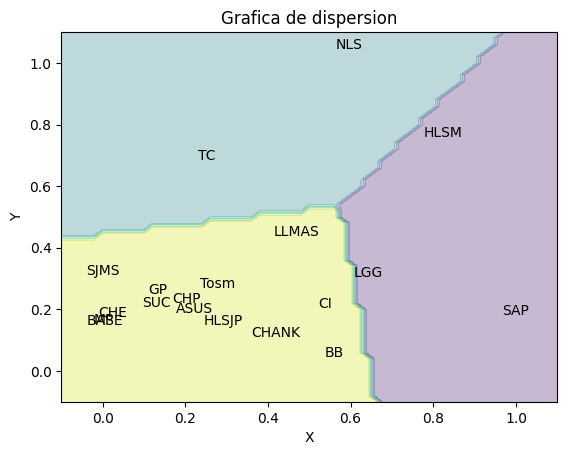

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Supongamos que 'datosEs' contiene tus datos y etiquetas
X = datosEs[['C/G', 'G/N']]  # Seleccionamos solo dos características
y = datosEs['Max_Column']
yy = datosEs['WL']

# Convertir las etiquetas a enteros usando LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Crear una malla de puntos para mostrar las regiones de decisión
h = .02  # Paso en la malla
x_min, x_max = X_train.values[:, 0].min() - 1, X_train.values[:, 0].max() + 1
y_min, y_max = X_train.values[:, 1].min() - 1, X_train.values[:, 1].max() + 1
xx, yy_mesh = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtener las predicciones para cada punto en la malla
Z = lr.predict(np.c_[xx.ravel(), yy_mesh.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar las regiones de decisión
plt.contourf(xx, yy_mesh, Z, alpha=0.3)

# Anotar los nombres de los puntos usando la columna 'WL'
for i, txt in enumerate(datosEs['WL']):
    plt.annotate(txt, (X.values[i, 0], X.values[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grafica de dispersion')

# Establecer los límites de los ejes x e y para hacer zoom
plt.xlim(X.values[:, 0].min() - 0.1, X.values[:, 0].max() + 0.1)
plt.ylim(X.values[:, 1].min() - 0.1, X.values[:, 1].max() + 0.1)

plt.show()
plt.savefig("grafica13.eps", format='eps')
plt.close()


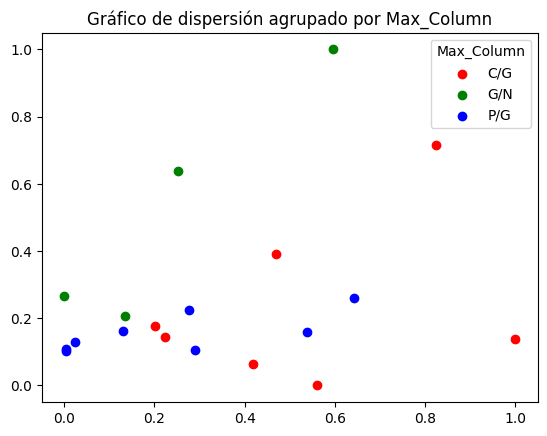

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

DataT= pd.DataFrame(datosEs)

colors = {'C/G': 'red', 'G/N': 'green', 'P/G': 'blue'}

fig, ax = plt.subplots()

for group, color in colors.items():
    subset = DataT[DataT['Max_Column'] == group]
    ax.scatter(subset['C/G'], subset['G/N'], label=group, color=color)
ax.set_title('Gráfico de dispersión agrupado por Max_Column')
ax.legend(title='Max_Column')

plt.show()